***Import Necessary Libraries***

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
#!pip install researchpy
import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

***Loading Dataset***

In [ ]:
expenses = pd.read_csv("expenses.csv")
df = expenses.copy()

# Structure and nature of data

In [ ]:
df.head() #First 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()  #Last 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.describe().T #Descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.dtypes #variable types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The gender variable is in the object type. I will change it to Category type with pandas library:

In [ ]:
df.sex = pd.Categorical(df.sex) 

In [ ]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

In [ ]:
df.smoker = pd.Categorical(df.smoker) 

In [ ]:
df.region = pd.Categorical(df.region) 

In [ ]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Are there any missing values in the data set?

In [ ]:
df.isnull().values.any()

False

There are no missing values in the dataset

**Only Categorical Variables and Summaries**

In [ ]:
kat_df = df.select_dtypes(include = ["category"])

In [ ]:
kat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
kat_df.sex.unique() #Values of the categorical variable

['female', 'male']
Categories (2, object): ['female', 'male']

In [ ]:
kat_df["sex"].value_counts().count()

2

In [ ]:
kat_df.smoker.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [ ]:
kat_df["smoker"].value_counts().count()

2

In [ ]:
kat_df.region.unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
kat_df["region"].value_counts().count()

4

How many rows and columns does the dataset consist of?

In [ ]:
df.shape

(1338, 7)

Accessing the Frequencies of the Classes of a Categorical Variable

In [ ]:
kat_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
kat_df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
kat_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**summaries of numeric variables**

In [ ]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [ ]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df_num["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
df_num["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
df_num["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [ ]:
df_num["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**Catching Outliers**

In [ ]:
df_age = df["age"]
df_bmi = df["bmi"]
df_children = df["children"]
df_charges = df["charges"]

I will check with the boxplot chart, but the boxplot chart does not give detailed information.

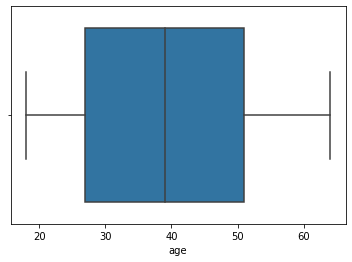

In [ ]:
sns.boxplot(x = df_age)

There doesn't seem to be any outliers for the age variable

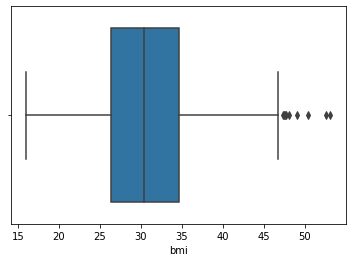

In [ ]:
sns.boxplot(x = df_bmi)

There seem to be outliers for the BMI variable

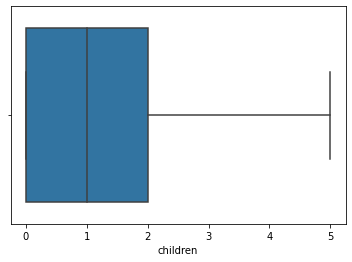

In [ ]:
sns.boxplot(x = df_children)

There doesn't seem to be any outliers for the children variable

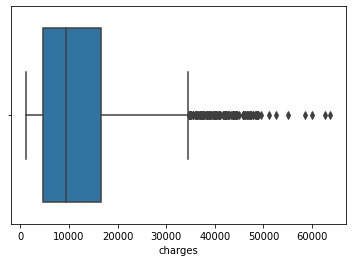

In [ ]:
sns.boxplot(x = df_charges)

There seem to be outliers for the charges variable

Let's observe the outliers in more detail by applying statistical methods.

In [ ]:
Q1_age = df_age.quantile(0.25) #will take the value corresponding to 25% of the variable when sorted from smallest to largest.
Q3_age = df_age.quantile(0.75) #will take the value corresponding to 75% of the variable when sorted from smallest to largest.
IQR_age = Q3_age-Q1_age

In [ ]:
Q1_age

27.0

In [ ]:
Q3_age

51.0

In [ ]:
IQR_age

24.0

In [ ]:
lower_bound_age = Q1_age- 1.5*IQR_age #Defining threshold values
upper_bound_age = Q3_age + 1.5*IQR_age

In [ ]:
lower_bound_age

-9.0

In [ ]:
upper_bound_age

87.0

In [ ]:
(df_age < lower_bound_age).sum() | (df_age > upper_bound_age).sum()

0

It supports boxplot plot. Age variable has no outlier

In [ ]:
Q1_bmi = df_bmi.quantile(0.25) 
Q3_bmi = df_bmi.quantile(0.75)
IQR_bmi = Q3_bmi-Q1_bmi

In [ ]:
Q1_bmi

26.29625

In [ ]:
Q3_bmi

34.69375

In [ ]:
IQR_bmi

8.3975

In [ ]:
lower_bound_bmi = Q1_bmi- 1.5*IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5*IQR_bmi

In [ ]:
lower_bound_bmi

13.7

In [ ]:
upper_bound_bmi

47.290000000000006

In [ ]:
(df_bmi < lower_bound_bmi).sum() | (df_bmi > upper_bound_bmi).sum()

9

In [ ]:
outlier_tf_bmi_l = (df_bmi < lower_bound_bmi)

In [ ]:
outlier_tf_bmi_l.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [ ]:
df_bmi[outlier_tf_bmi_l]

Series([], Name: bmi, dtype: float64)

In [ ]:
outlier_tf_bmi_u = (df_bmi > upper_bound_bmi)

In [ ]:
outlier_tf_bmi_u.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [ ]:
df_bmi[outlier_tf_bmi_u]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [ ]:
df_bmi[outlier_tf_bmi_u].index #indexes of observations with outliers.

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

It supports boxplot. BMI variable has 9 outliers

In [ ]:
Q1_children = df_children.quantile(0.25) 
Q3_children = df_children.quantile(0.75)
IQR_children = Q3_children-Q1_children

In [ ]:
Q1_children

0.0

In [ ]:
Q3_children

2.0

In [ ]:
IQR_children

2.0

In [ ]:
lower_bound_children = Q1_children- 1.5*IQR_children
upper_bound_children = Q3_children + 1.5*IQR_children

In [ ]:
lower_bound_children

-3.0

In [ ]:
upper_bound_children

5.0

In [ ]:
(df_children < lower_bound_children).sum() | (df_children > upper_bound_children).sum()

0

It supports boxplot. Children variable has no outlier

In [ ]:
Q1_charges = df_charges.quantile(0.25) 
Q3_charges = df_charges.quantile(0.75)
IQR_charges = Q3_charges-Q1_charges

In [ ]:
Q1_charges

4740.28715

In [ ]:
Q3_charges

16639.912515

In [ ]:
IQR_charges

11899.625365

In [ ]:
lower_bound_charges = Q1_charges- 1.5*IQR_charges
upper_bound_charges = Q3_charges + 1.5*IQR_charges

In [ ]:
lower_bound_charges

-13109.1508975

In [ ]:
upper_bound_charges

34489.350562499996

In [ ]:
(df_charges < lower_bound_charges).sum() | (df_charges > upper_bound_charges).sum()

139

In [ ]:
outlier_tf_charges_l = (df_charges < lower_bound_charges)

In [ ]:
df_charges[outlier_tf_charges_l]

Series([], Name: charges, dtype: float64)

In [ ]:
outlier_tf_charges_u = (df_charges > upper_bound_charges)

In [ ]:
df_charges[outlier_tf_charges_u]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

It supports boxplot. Charges variable has 139 outliers

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


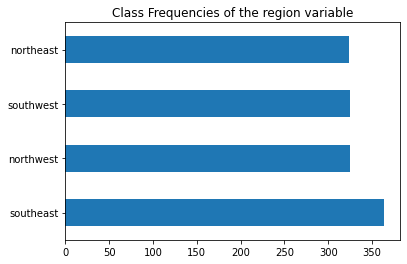

In [ ]:
df["region"].value_counts().plot.barh().set_title("Class Frequencies of the region variable");

I observe that the class frequencies of the variable region are close to each other

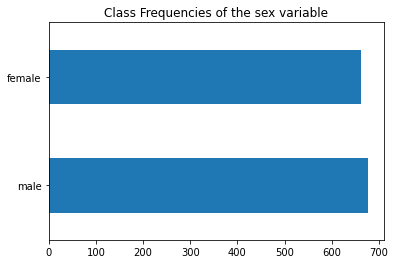

In [ ]:
df["sex"].value_counts().plot.barh().set_title("Class Frequencies of the sex variable");

I observe that the class frequencies of the variable sex are close to each other





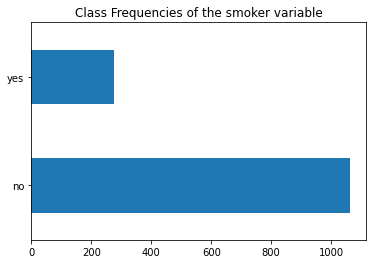

In [ ]:
df["smoker"].value_counts().plot.barh().set_title("Class Frequencies of the smoker variable");

I observe that non-smokers are much more than smokers

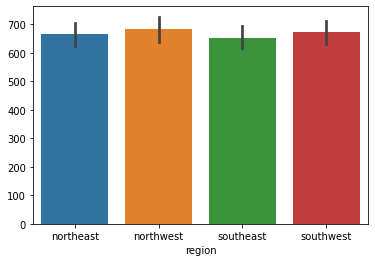

In [ ]:
sns.barplot(x = "region", y = df.region.index, data= df);

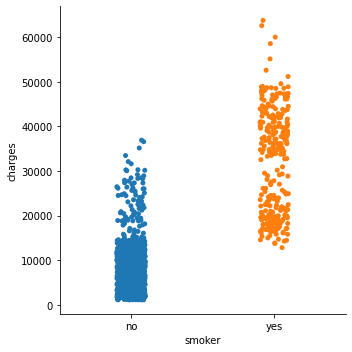

In [ ]:
sns.catplot(x = "smoker", y = "charges", data = df);

Smokers expenditure much more than non-smokers.

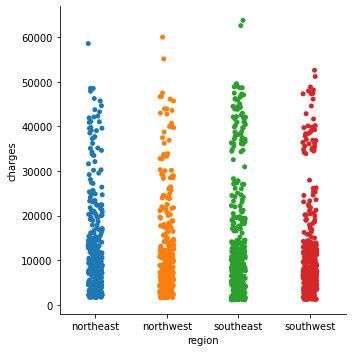

In [ ]:
sns.catplot(x = "region", y = "charges", data = df);

The highest expenditure was seen in the southeast region, but overall there was not much difference between regions.

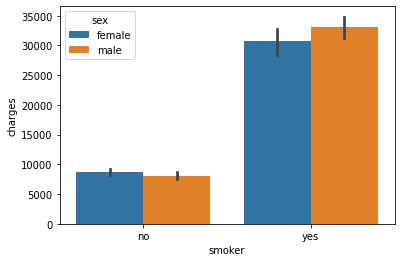

In [ ]:
sns.barplot(x = "smoker", y = "charges", hue = "sex", data = df);

The highest expenditure is in men who smoke.

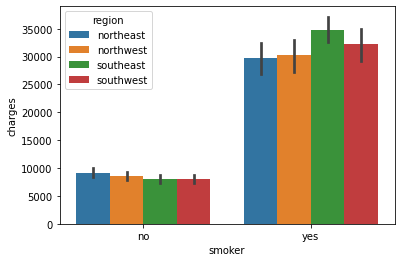

In [ ]:
sns.barplot(x = "smoker", y = "charges", hue = "region", data = df);

The highest expenditure is in smokers and those living in the southeast region.

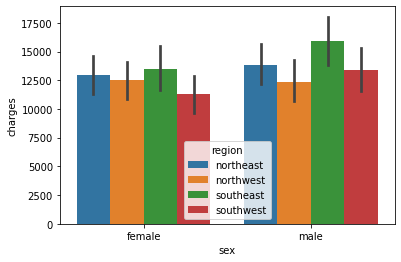

In [ ]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

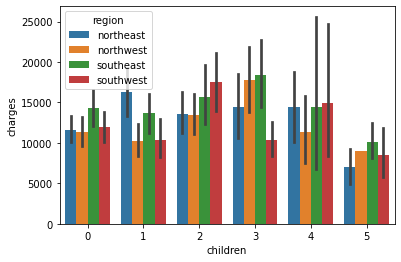

In [ ]:
sns.barplot(x = "children", y = "charges", hue = "region", data = df);

Superficially, the highest expenditure from these graphs is seen among men who smokes and living in the southeast region.

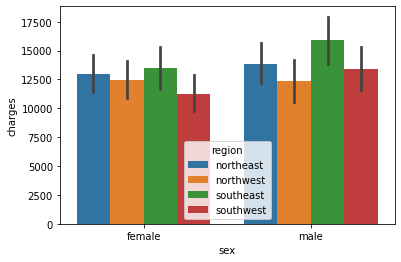

In [ ]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

In [ ]:
df.groupby(["smoker","sex"])["charges"].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [ ]:
df.groupby(["smoker","region"])["charges"].mean()

smoker  region   
no      northeast     9165.531672
        northwest     8556.463715
        southeast     8032.216309
        southwest     8019.284513
yes     northeast    29673.536473
        northwest    30192.003182
        southeast    34844.996824
        southwest    32269.063494
Name: charges, dtype: float64

In [ ]:
df.groupby(["sex","region"])["charges"].mean()

sex     region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: charges, dtype: float64

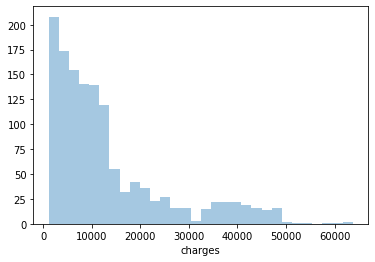

In [ ]:
sns.distplot(df.charges, kde = False);

charges variable has right-skewed distribution

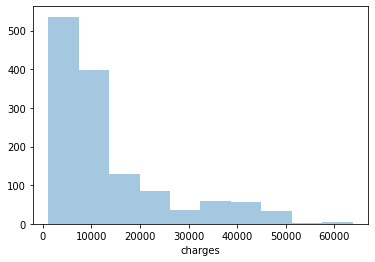

In [ ]:
sns.distplot(df.charges, bins = 10, kde = False);

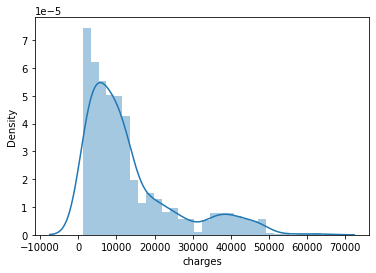

In [ ]:
sns.distplot(df.charges);

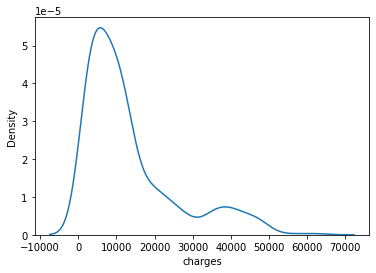

In [ ]:
sns.distplot(df.charges, hist = False);

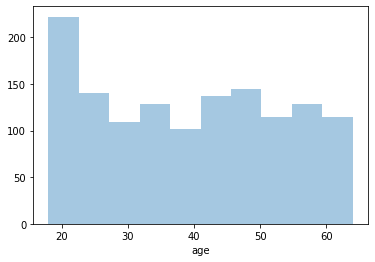

In [ ]:
sns.distplot(df.age, bins = 10, kde = False);

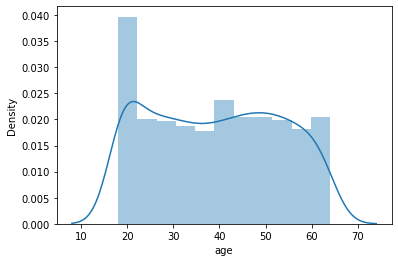

In [ ]:
sns.distplot(df.age);

charges variable has right-skewed distribution

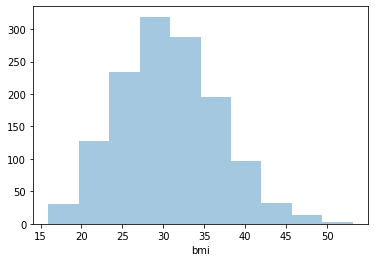

In [ ]:
sns.distplot(df.bmi, bins = 10, kde = False);

bmi variable has right-skewed distribution. But there is not much disorder.close to normal distribution.

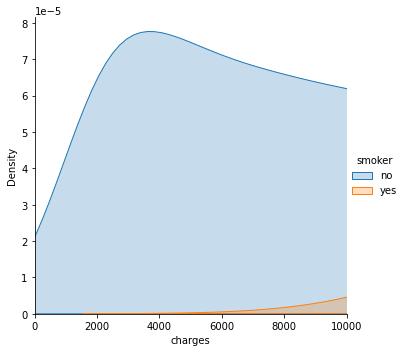

In [ ]:
(sns
 .FacetGrid(df,
              hue = "smoker",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

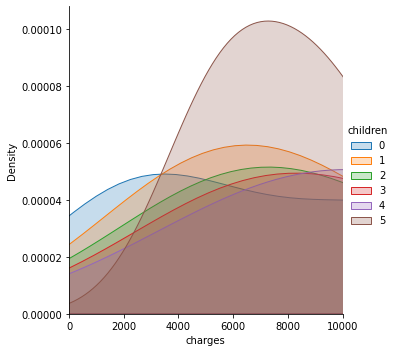

In [ ]:
(sns
 .FacetGrid(df,
              hue = "children",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

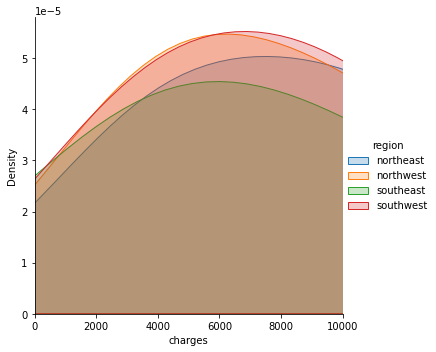

In [ ]:
(sns
 .FacetGrid(df,
              hue = "region",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

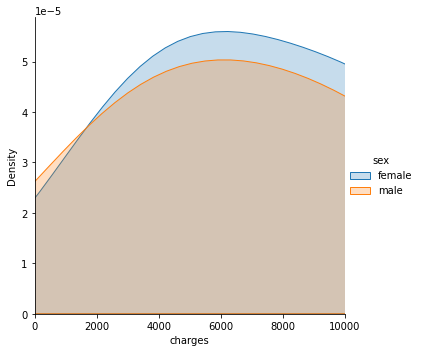

In [ ]:
(sns
 .FacetGrid(df,
              hue = "sex",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

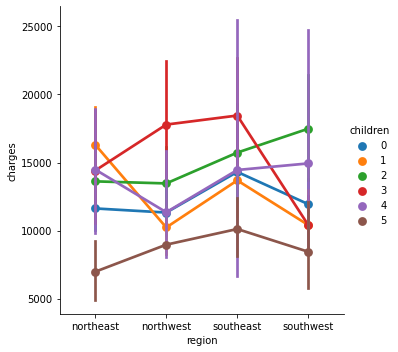

In [ ]:
sns.catplot(x = "region", y = "charges", hue = "children", kind = "point", data = df);

Which region has more expenditure?

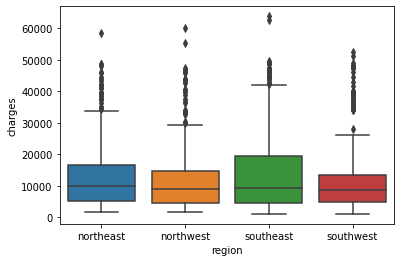

In [ ]:
sns.boxplot(x = "region", y = "charges", data = df);

southeast

Which gender has more expenditure?

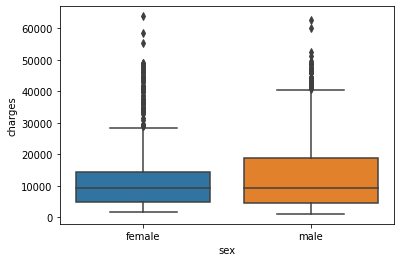

In [ ]:
sns.boxplot(x = "sex", y = "charges", data = df);

male

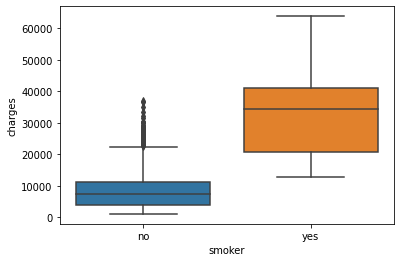

In [ ]:
sns.boxplot(x = "smoker", y = "charges", data = df);

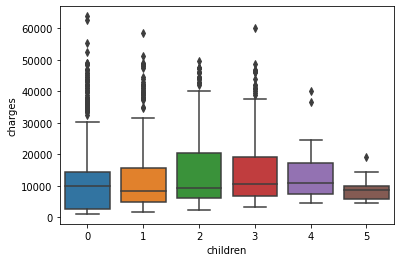

In [ ]:
sns.boxplot(x = "children", y = "charges", data = df);

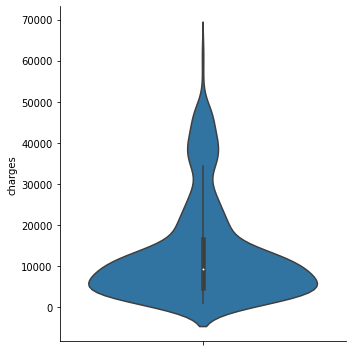

In [ ]:
sns.catplot(y = "charges", kind = "violin", data = df);

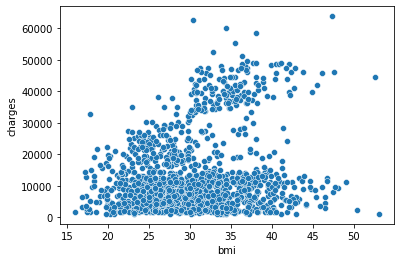

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", data = df);

It's not a linear graph. However, I can see that the charges variable increases as the bmi value increases.

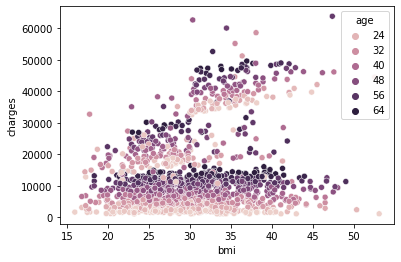

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", hue = "age",data = df);

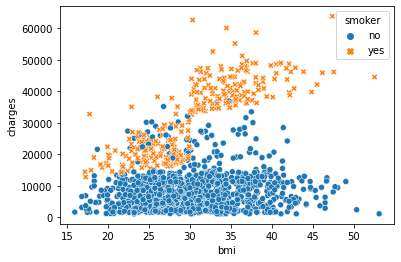

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", hue = "smoker", style = "smoker", data = df);

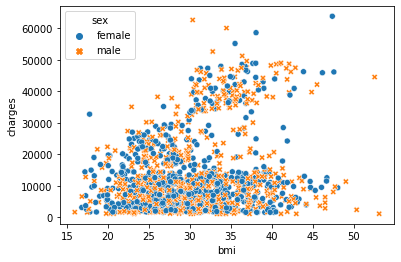

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", hue = "sex", style = "sex", data = df);

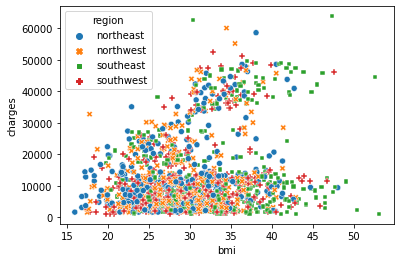

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", hue = "region", style = "region", data = df);

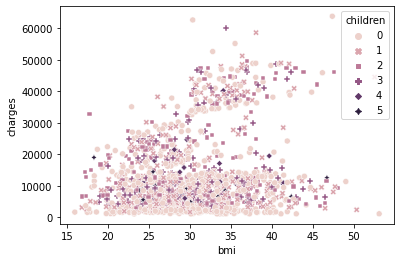

In [ ]:
sns.scatterplot(x = "bmi", y = "charges", hue = "children", style = "children", data = df);

**Showing the Linear Relationship**

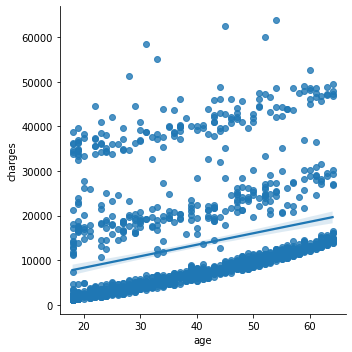

In [ ]:
sns.lmplot(x = "age", y = "charges", data = df);

There is no linear relationship between them

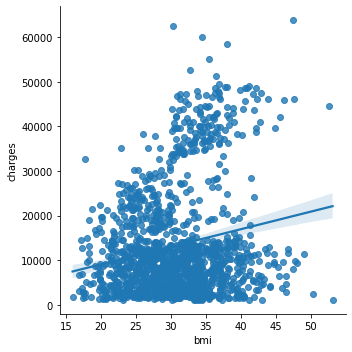

In [ ]:
sns.lmplot(x = "bmi", y = "charges", data = df);

There is no linear relationship between them

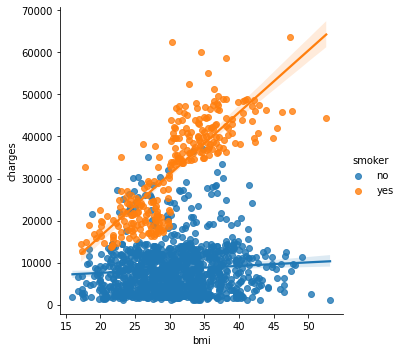

In [ ]:
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = df);

As the smoker and bmi variables increase, the charges variable also increases considerably.

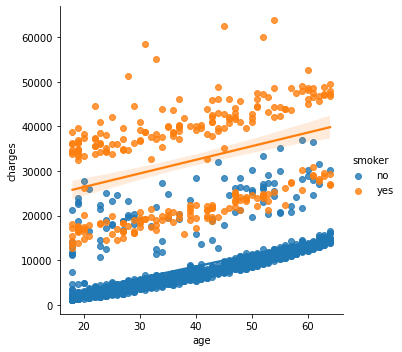

In [ ]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = df);

As the smoker and age variables increase, the charges variable also increases.

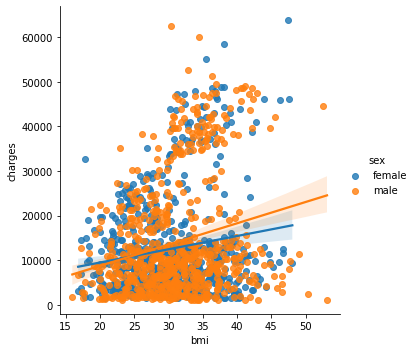

In [ ]:
sns.lmplot(x = "bmi", y = "charges", hue = "sex", data = df);

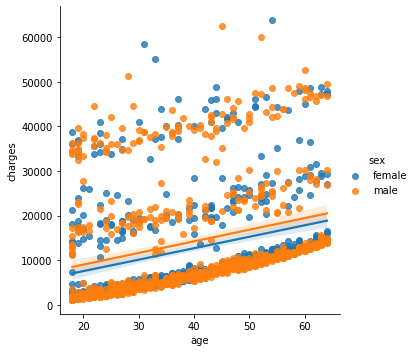

In [ ]:
sns.lmplot(x = "age", y = "charges", hue = "sex", data = df);

In general, there is no linear relationship between the variables. This may be due to the skewness of the distribution within the variables themselves.

**Scatterplot Matrix**

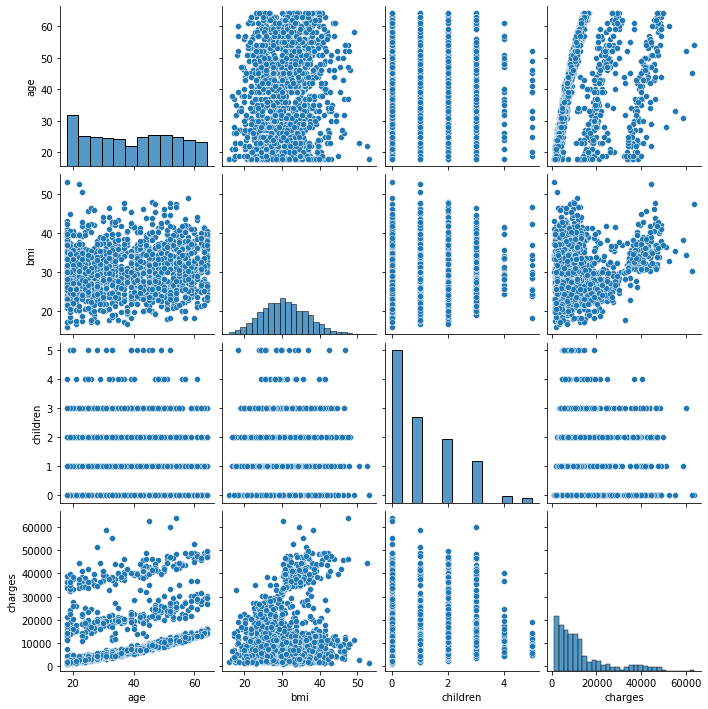

In [ ]:
sns.pairplot(df);

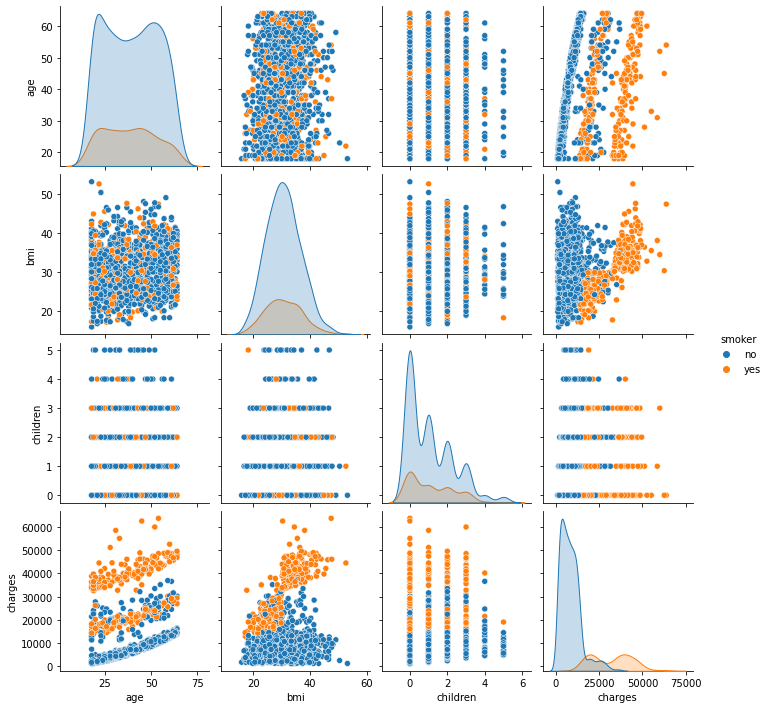

In [ ]:
sns.pairplot(df, hue = "smoker");

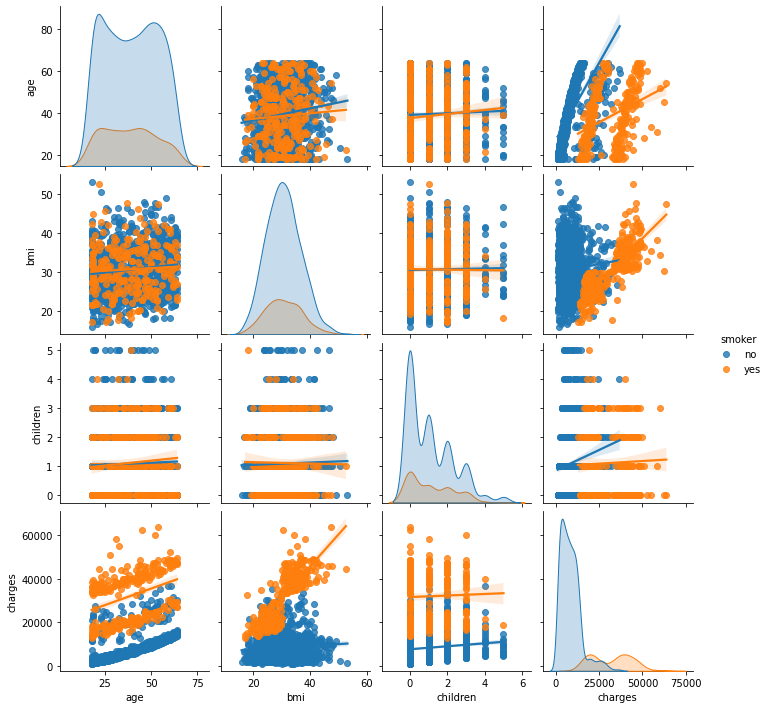

In [ ]:
sns.pairplot(df, kind = "reg", hue = "smoker");

**Heatmap**

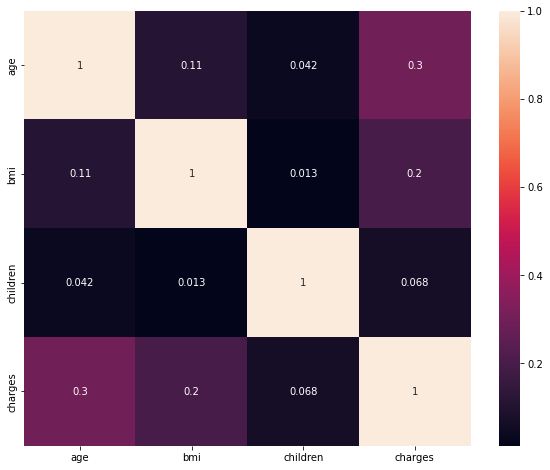

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, data=df)

There is no high correlation between numerical variables

# **Statisticts**

In [ ]:
rp.summary_cont(df[["bmi","charges","age"]]) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,bmi,1338.0,30.6634,6.0982,0.1667,30.3363,30.9904
1,charges,1338.0,13270.4223,12110.0112,331.0675,12620.9540,13919.8905
2,age,1338.0,39.2070,14.0500,0.3841,38.4535,39.9605


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
rp.summary_cat(df[["sex","children","region","smoker"]])

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,children,0,574,42.90
3,,1,324,24.22
4,,2,240,17.94
5,,3,157,11.73
6,,4,25,1.87
7,,5,18,1.35
8,region,southeast,364,27.20
9,,northwest,325,24.29


In [ ]:
df[["bmi","charges"]].cov() #covariance information = variability in relation to variables

,bmi,charges
bmi,37.187884,1.464730e+04
charges,14647.304426,1.466524e+08


In [ ]:
df[["age","charges"]].cov()

,age,charges
age,197.401387,5.087480e+04
charges,50874.802298,1.466524e+08


In [ ]:
charges = df["charges"]

In [ ]:
sms.DescrStatsW(charges).tconfint_mean() #t.confint_mean = reveals the confidence interval.

(12620.954034192646, 13919.89049608987)

The 12620.95 to 12620.95 range has a 95% probability to cover the average amount customers expenditure


In [ ]:
bmi = df["bmi"]

In [ ]:
sms.DescrStatsW(bmi).tconfint_mean() 

(30.336346903054107, 30.99044681891899)

The 30.33 to 30.99 range is 95% likely to cover the average BMI of customers

In [ ]:
age = df["age"]

In [ ]:
sms.DescrStatsW(age).tconfint_mean() 

(38.453516373452935, 39.96053444866964)

# **Transformation**

I want to remember the graphs of the variables

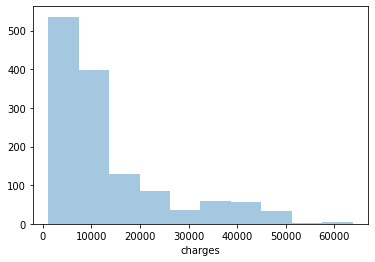

In [ ]:
sns.distplot(df.charges, bins = 10, kde = False);

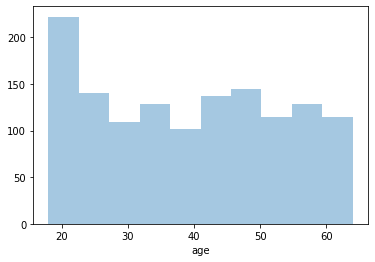

In [ ]:
sns.distplot(df.age, bins = 10, kde = False);

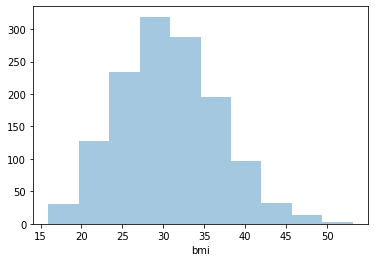

In [ ]:
sns.distplot(df.bmi, bins = 10, kde = False);

In [ ]:
charges_sqrt = np.sqrt(charges)

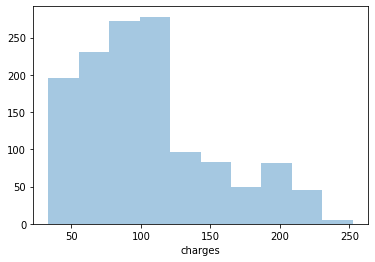

In [ ]:
sns.distplot(charges_sqrt, bins = 10, kde = False);

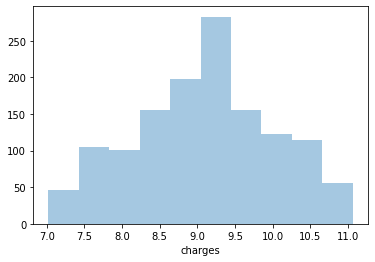

In [ ]:
charges_log = np.log(charges)
sns.distplot(charges_log, bins = 10, kde = False);

charges variable converged to normal with log transform

In [ ]:
df["charges_log"] = np.log(charges)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


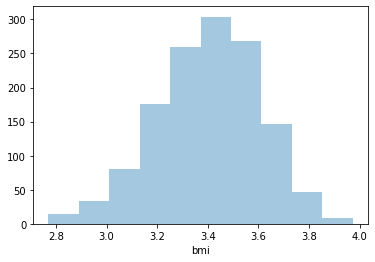

In [222]:
bmi_log = np.log(bmi)
sns.distplot(bmi_log, bins = 10, kde = False);

BMI variable converged to normal with log transform

In [223]:
df["bmi_log"] = np.log(bmi)

In [224]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,bmi_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,3.363149


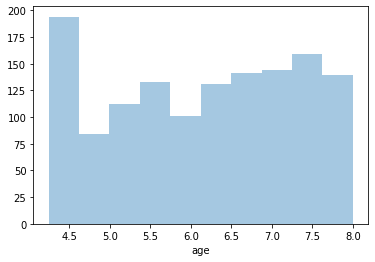

In [ ]:
age_sqrt = np.sqrt(age)
sns.distplot(age_sqrt, bins = 10, kde = False);


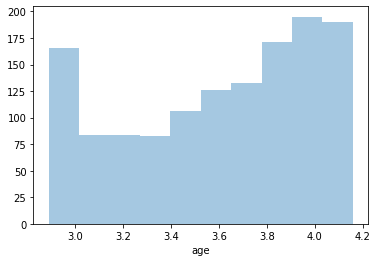

In [ ]:
age_log = np.log(age)
sns.distplot(age_log, bins = 10, kde = False);

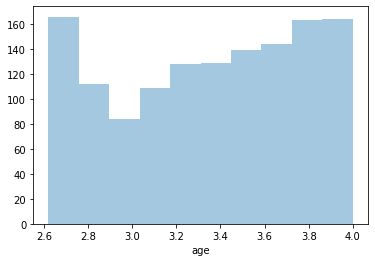

In [ ]:
age_cbrt = np.cbrt(age)
sns.distplot(age_cbrt, bins = 10, kde = False);

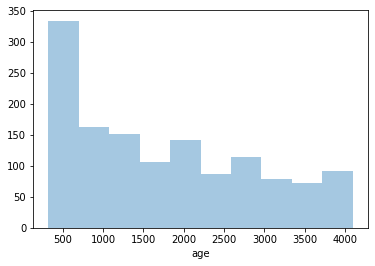

In [ ]:
age_square = np.square(age)
sns.distplot(age_square, bins = 10, kde = False);

No suitable conversion was found for the age variable. I want to apply the square transform under these conditions

**One hot encoding**

In [247]:
df_one_hot = df.copy()

In [ ]:
pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [ ]:
pd.get_dummies(df, columns = ["smoker"], prefix = ["smoker"])

In [250]:
pd.get_dummies(df, columns = ["region"], prefix = ["region"]).head()

,age,sex,bmi,children,smoker,charges,charges_log,bmi_log,age_square,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,9.734176,3.328627,361,0,0,0,1
1,18,male,33.770,1,no,1725.55230,7.453302,3.519573,324,0,0,1,0
2,28,male,33.000,3,no,4449.46200,8.400538,3.496508,784,0,0,1,0
3,33,male,22.705,0,no,21984.47061,9.998092,3.122585,1089,0,1,0,0
4,32,male,28.880,0,no,3866.85520,8.260197,3.363149,1024,0,1,0,0


# **Modelling**

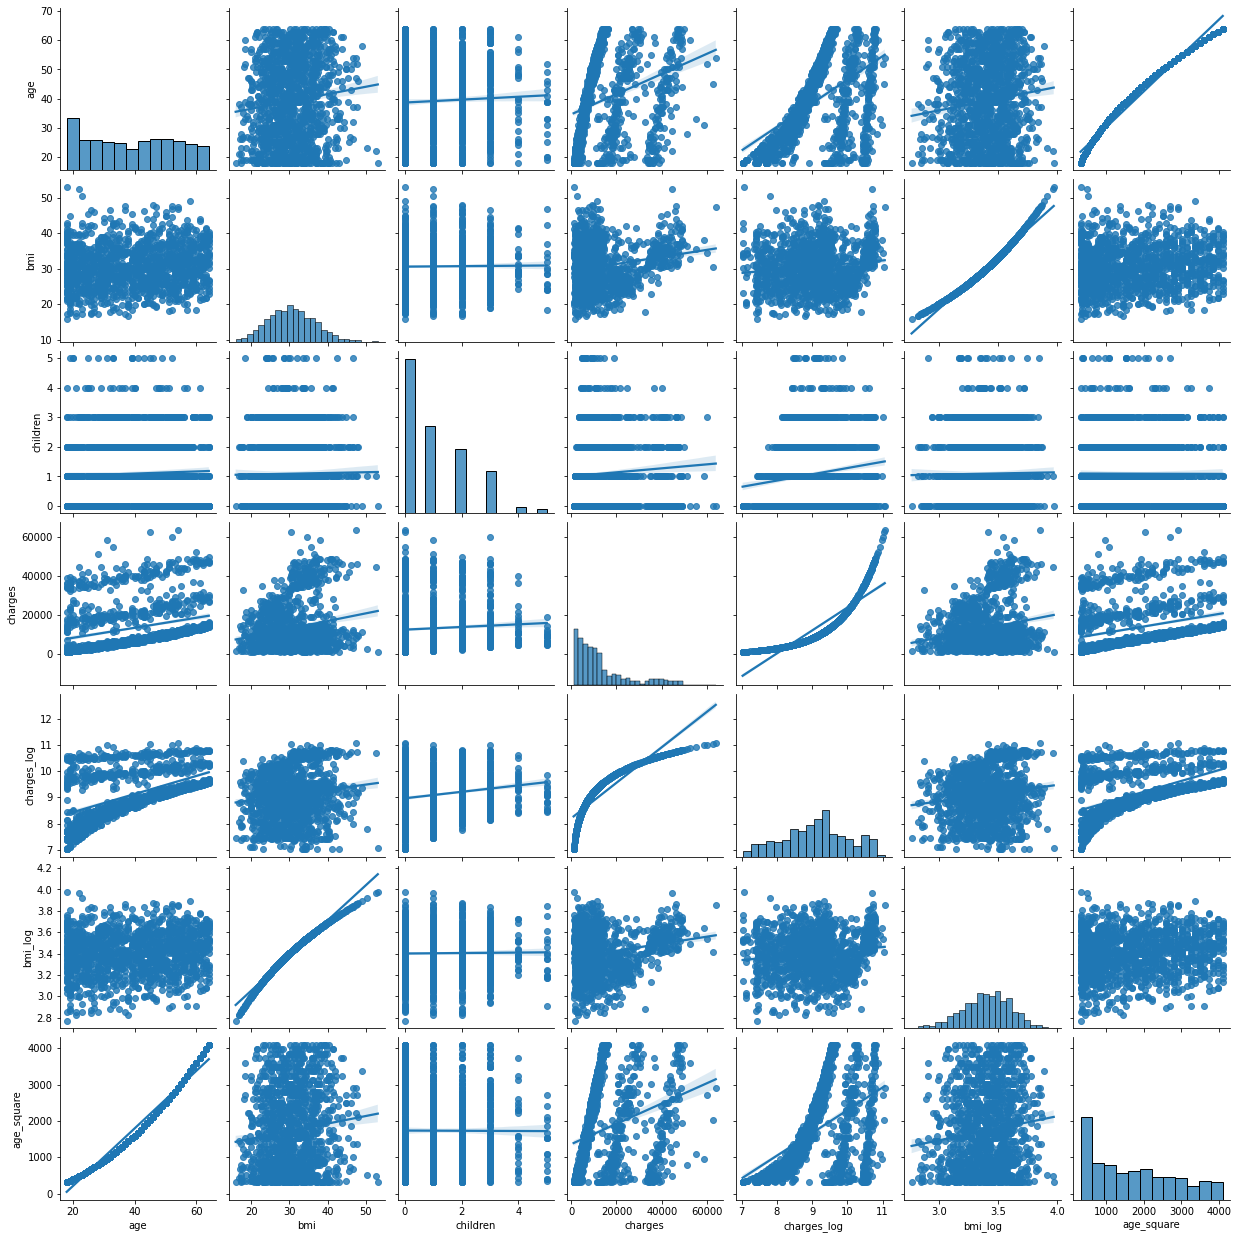

In [251]:
sns.pairplot(df, kind  ="reg");